In [5]:
import os
import struct
import numpy as np
path = './MNIST/'
kind = 'train'
kind_2='t10k'

labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
labels_path_2= os.path.join(path,'%s-labels.idx1-ubyte' % kind_2)
images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
images_path_2 = os.path.join(path,'%s-images.idx3-ubyte' % kind_2)
with open(labels_path, 'rb') as lbpath:
    # 使用struct.unpack方法读取前两个数据，>代表高位在前，I代表32位整型。lbpath.read(8)表示一次从文件中读取8个字节
    # 这样读到的前两个数据分别是magic number和样本个数
    magic, n = struct.unpack('>II',lbpath.read(8))
    # 使用np.fromfile读取剩下的数据
    labels = np.fromfile(lbpath,dtype=np.uint8) # labels是60000 * 1的列向量
with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    # images是60000*784的矩阵。每行一个图像。注意28^2=784
    images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
    
with open(labels_path_2, 'rb') as lbpath:
    # 使用struct.unpack方法读取前两个数据，>代表高位在前，I代表32位整型。lbpath.read(8)表示一次从文件中读取8个字节
    # 这样读到的前两个数据分别是magic number和样本个数
    magic, n = struct.unpack('>II',lbpath.read(8))
    # 使用np.fromfile读取剩下的数据
    labels_2 = np.fromfile(lbpath,dtype=np.uint8) # labels是60000 * 1的列向量
with open(images_path_2, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    # images是60000*784的矩阵。每行一个图像。注意28^2=784
    images_2 = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels_2), 784)
#print("运行成功")



In [11]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
def show(images, labels, prediction, index):
    fig = plt.figure(figsize=(15, 15),facecolor='blue')#表大小
    #标题
    plt.suptitle('svm from'+str(index)+'to'+str(index+36))
    
    for i in range(0, 36):
        ax = plt.subplot(6, 6, i + 1)#5行5列，第i+1个子图''''
        #在2D常规栅格上显示图像或数据
        #给数组一个新的形状(维度变化而数据不变)而不改变其数据
        ax.imshow(np.reshape(images[index], (28, 28)),
                  cmap=plt.cm.gray_r, interpolation='nearest')

        title = "label=" + str(labels[index])   # 构建图片上要显示的title
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[index])

        ax.set_title(title, fontsize=15)#字号大一点清楚
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

ending
--- 主要分类指标打印 ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



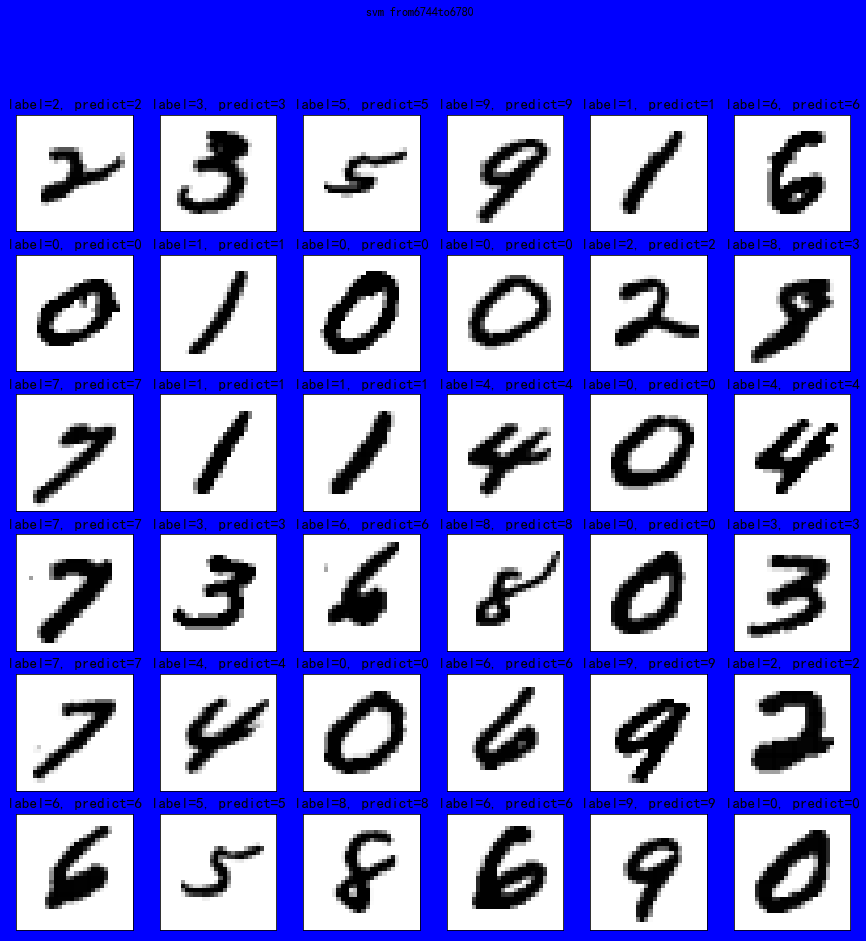

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn import svm
model = svm.SVC(gamma='scale', C=100, decision_function_shape='ovr', kernel='rbf')
#model = SVC(C=10, kernel='linear')
model.fit(images[:20000], labels[:20000])

# 使用测试数据来预测，返回值预测分类数据
z = model.predict(images_2)

print("ending")

# 打印主要分类指标的文本报告
print('--- 主要分类指标打印 ---')
print(classification_report(labels_2, z))

show(images_2, labels_2, z,  np.random.randint(0,9989))